**QUESTION 4 - Project Dataset**

**Tahir Manuel D Mello  
BIS634 Assignment 3**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Identify a data set online that you find interesting that could potentially be used for the final project; the main requirements is that there needs to be many (hundreds or more) data items with several identifiable variables, at least one of which could be viewed as an output variable that you could predict from the others. **(5 points)**

In [2]:
data = pd.read_csv('players_22.csv', low_memory=False)

This is a dataset titled 'FIFA 22 complete player dataset' compiled by STEFANO LEONE on Kaggle.
https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset?select=players_22.csv

It contains all data about all soccer (referred to as football from here on for my convenience :) ) players on the FIFA Football game published by EA Sports FC.
The data was scraped from the publicly available website sofifa.com by Stefano Leone and uploaded to Kaggle.

It contains 110 columns of information about 19239 professional players.
Apart from game stats, it also contains information about player nationality, position, age and importantly for this project, player contract information.

The output variable I am interested in is the player wage and player value.
These are variables that are generally determined by various factors that may be football related (skill, position, etc.) as well as others that are not like age, contract status, maybe nationality.

I want to build a predictor of player wage and value with the other variables present in this dataset. I plan on using just the database of players from the 2022 version of the game.

This will potentially allow me to do two interesting things: 
1. Find out which variables have the most effect on player wage (with the most weight in the predictor, maybe)
2. Find out which players are under/overpaid and why (maybe).

In [3]:
data.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
len(data)

19239

Describe the dataset. [Your answer should address (but not be limited to): how many variables? Are the key variables explicitly specified or are they things you would have to derive (e.g. by inferring from text)? Are any of the variables exactly derivable from other variables? (i.e. are any of them redundant?) Are there any variables that could in principle be statistically predicted from other variables? How many rows/data points are there? Is the data in a standard format? If not, how could you convert it to a standard format?] **(5 points)**

The raw data has a 110 variables. (Not all of them are useful)  
The raw data has 19239 rows. Each one is a unique player (conveniently identified by the unique sofifa_id).  
  
There is a lot of important player metadata like club, age, wage, posiitions played, information about contracts and nationality. These need to be cleaned in various ways to standardize the data.  
Several of the key variables are explicitly specified (pace, shooting and other stats are defined on a scale of 0 to 99).   
Some important variables have not been defined explicitly. Player positions have been specified as strings (sometimes with multiple entries if a player plays in multiple positions). These will need to be stripped and cleaned properly to convert it to standard form.  
Variables might also have to be normalized since there are multiple distribution types for different variables in the data.  

There are a lot of unneccesary variables like logo URLs, jersey numbers, position dependent ratings, etc. that will be discarded during data cleaning.   
The total player rating is in practice statistically predicted by other ratings. However, the weighting of these ratings is not known clearly.  




Describe the terms of use and identify any key restrictions. **(5 points)**

This data has no restrictions. There is no access process or permissions required.  
No type of analysis is forbidden on this data.
  
Both Kaggle and the original source - soFIFA.com - have open public use policies for their data.    
  
Thus, this data can be shared and distributed freely.

Do data exploration on the dataset, and present a representative set of figures that gives insight into the data. Comment on the insights gained. **(5 points)**

All the variables are not useful.  
I have sliced the dataset and picked out variables in 3 categories that will be needed for this project.

In [5]:
player_metadata = data[['sofifa_id', 'short_name', 'long_name', 'age', 'player_positions', \
                        'club_name', 'value_eur', 'wage_eur','release_clause_eur', \
                        'club_joined', 'club_contract_valid_until', \
                        'league_name', 'league_level' , 'nationality_name',\
                        ]]

player_attributes = data[['sofifa_id', 'height_cm', 'weight_kg', 'preferred_foot', \
                          'weak_foot', 'skill_moves', 'international_reputation', 'body_type', \
                          'player_tags', 'player_traits']]

player_stats = pd.concat([ data[['sofifa_id', 'overall', 'potential']], data.iloc[:,37:78] ], axis=1)

In [6]:
player_metadata.head()

,sofifa_id,short_name,long_name,age,player_positions,club_name,value_eur,wage_eur,release_clause_eur,club_joined,club_contract_valid_until,league_name,league_level,nationality_name
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,34,"RW, ST, CF",Paris Saint-Germain,78000000.0,320000.0,144300000.0,2021-08-10,2023.0,French Ligue 1,1.0,Argentina
1,188545,R. Lewandowski,Robert Lewandowski,32,ST,FC Bayern München,119500000.0,270000.0,197200000.0,2014-07-01,2023.0,German 1. Bundesliga,1.0,Poland
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,36,"ST, LW",Manchester United,45000000.0,270000.0,83300000.0,2021-08-27,2023.0,English Premier League,1.0,Portugal
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,29,"LW, CAM",Paris Saint-Germain,129000000.0,270000.0,238700000.0,2017-08-03,2025.0,French Ligue 1,1.0,Brazil
4,192985,K. De Bruyne,Kevin De Bruyne,30,"CM, CAM",Manchester City,125500000.0,350000.0,232200000.0,2015-08-30,2025.0,English Premier League,1.0,Belgium


In [7]:
player_attributes.head()

,sofifa_id,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,player_tags,player_traits
0,158023,170,72,Left,4,4,5,Unique,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ..."
1,188545,185,81,Right,4,4,5,Unique,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,..."
2,20801,187,83,Right,4,5,5,Unique,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ..."
3,190871,175,68,Right,5,5,5,Unique,"#Speedster, #Dribbler, #Playmaker, #FK Special...","Injury Prone, Flair, Speed Dribbler (AI), Play..."
4,192985,181,70,Right,5,4,4,Unique,"#Dribbler, #Playmaker, #Engine, #Distance Shoo...","Injury Prone, Leadership, Early Crosser, Long ..."


In [8]:
player_stats

,sofifa_id,overall,potential,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,93,93,85.0,92.0,91.0,95.0,34.0,65.0,85,...,96,20,35,24,6,11,15,14,8,NaN
1,188545,92,92,78.0,92.0,79.0,86.0,44.0,82.0,71,...,88,35,42,19,15,6,12,8,10,NaN
2,20801,91,91,87.0,94.0,80.0,88.0,34.0,75.0,87,...,95,24,32,24,7,11,15,14,11,NaN
3,190871,91,91,91.0,83.0,86.0,94.0,37.0,63.0,85,...,93,35,32,29,9,9,15,15,11,NaN
4,192985,91,91,76.0,86.0,93.0,88.0,64.0,78.0,94,...,89,68,65,53,15,13,5,10,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,47,52,58.0,35.0,46.0,48.0,42.0,49.0,46,...,37,38,43,48,6,10,5,15,13,NaN
19235,262040,47,59,59.0,39.0,50.0,46.0,41.0,51.0,54,...,47,37,44,47,11,12,6,8,10,NaN
19236,262760,47,55,60.0,37.0,45.0,49.0,41.0,52.0,39,...,36,38,44,48,8,6,7,10,6,NaN
19237,262820,47,60,68.0,46.0,36.0,48.0,15.0,42.0,29,...,47,10,14,11,7,10,7,14,15,NaN


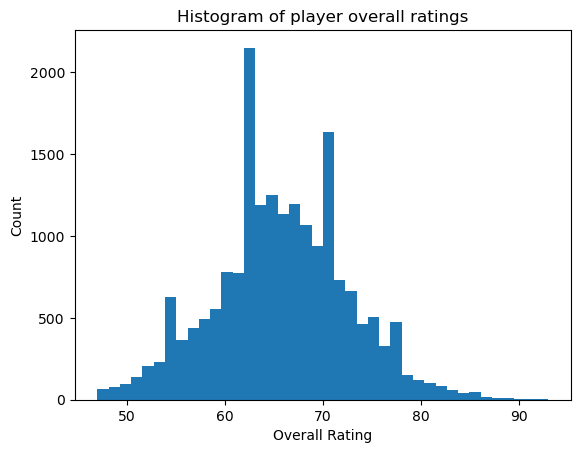

The median rating of players in FIFA 22 is 66 out of 100


In [9]:
import matplotlib.pyplot as plt

plt.hist(player_stats['overall'], bins = 40)
plt.title('Histogram of player overall ratings')
plt.ylabel('Count')
plt.xlabel('Overall Rating')
plt.show()

print("The median rating of players in FIFA 22 is", int(player_stats['overall'].median()), "out of 100")

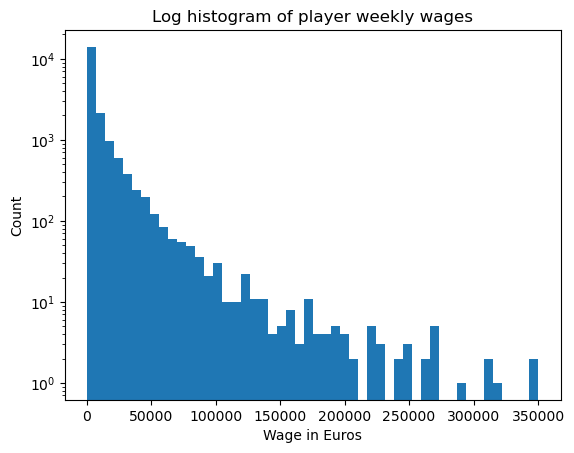

The median weekly wage of players in FIFA 22 is 3000 euros


In [10]:
plt.hist(player_metadata['wage_eur'], bins = 50, log=True)
plt.title('Log histogram of player weekly wages')
plt.ylabel('Count')
plt.xlabel('Wage in Euros')
plt.show()

print("The median weekly wage of players in FIFA 22 is", int(player_metadata['wage_eur'].median()), "euros")

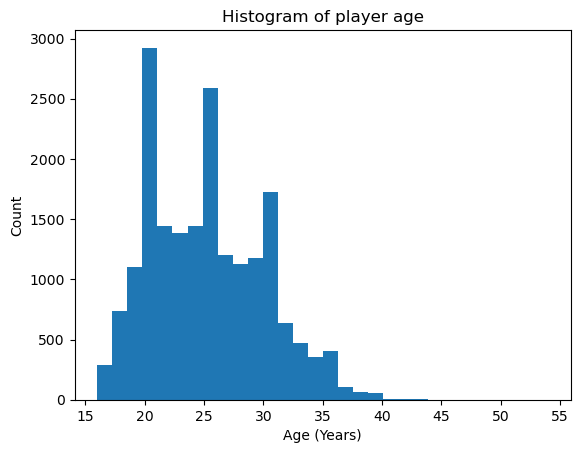

The median age of players in FIFA 22 is 25


In [11]:
plt.hist(player_metadata['age'], bins = 30)
plt.title('Histogram of player age')
plt.ylabel('Count')
plt.xlabel('Age (Years)')
plt.show()

print("The median age of players in FIFA 22 is", int(player_metadata['age'].median()))

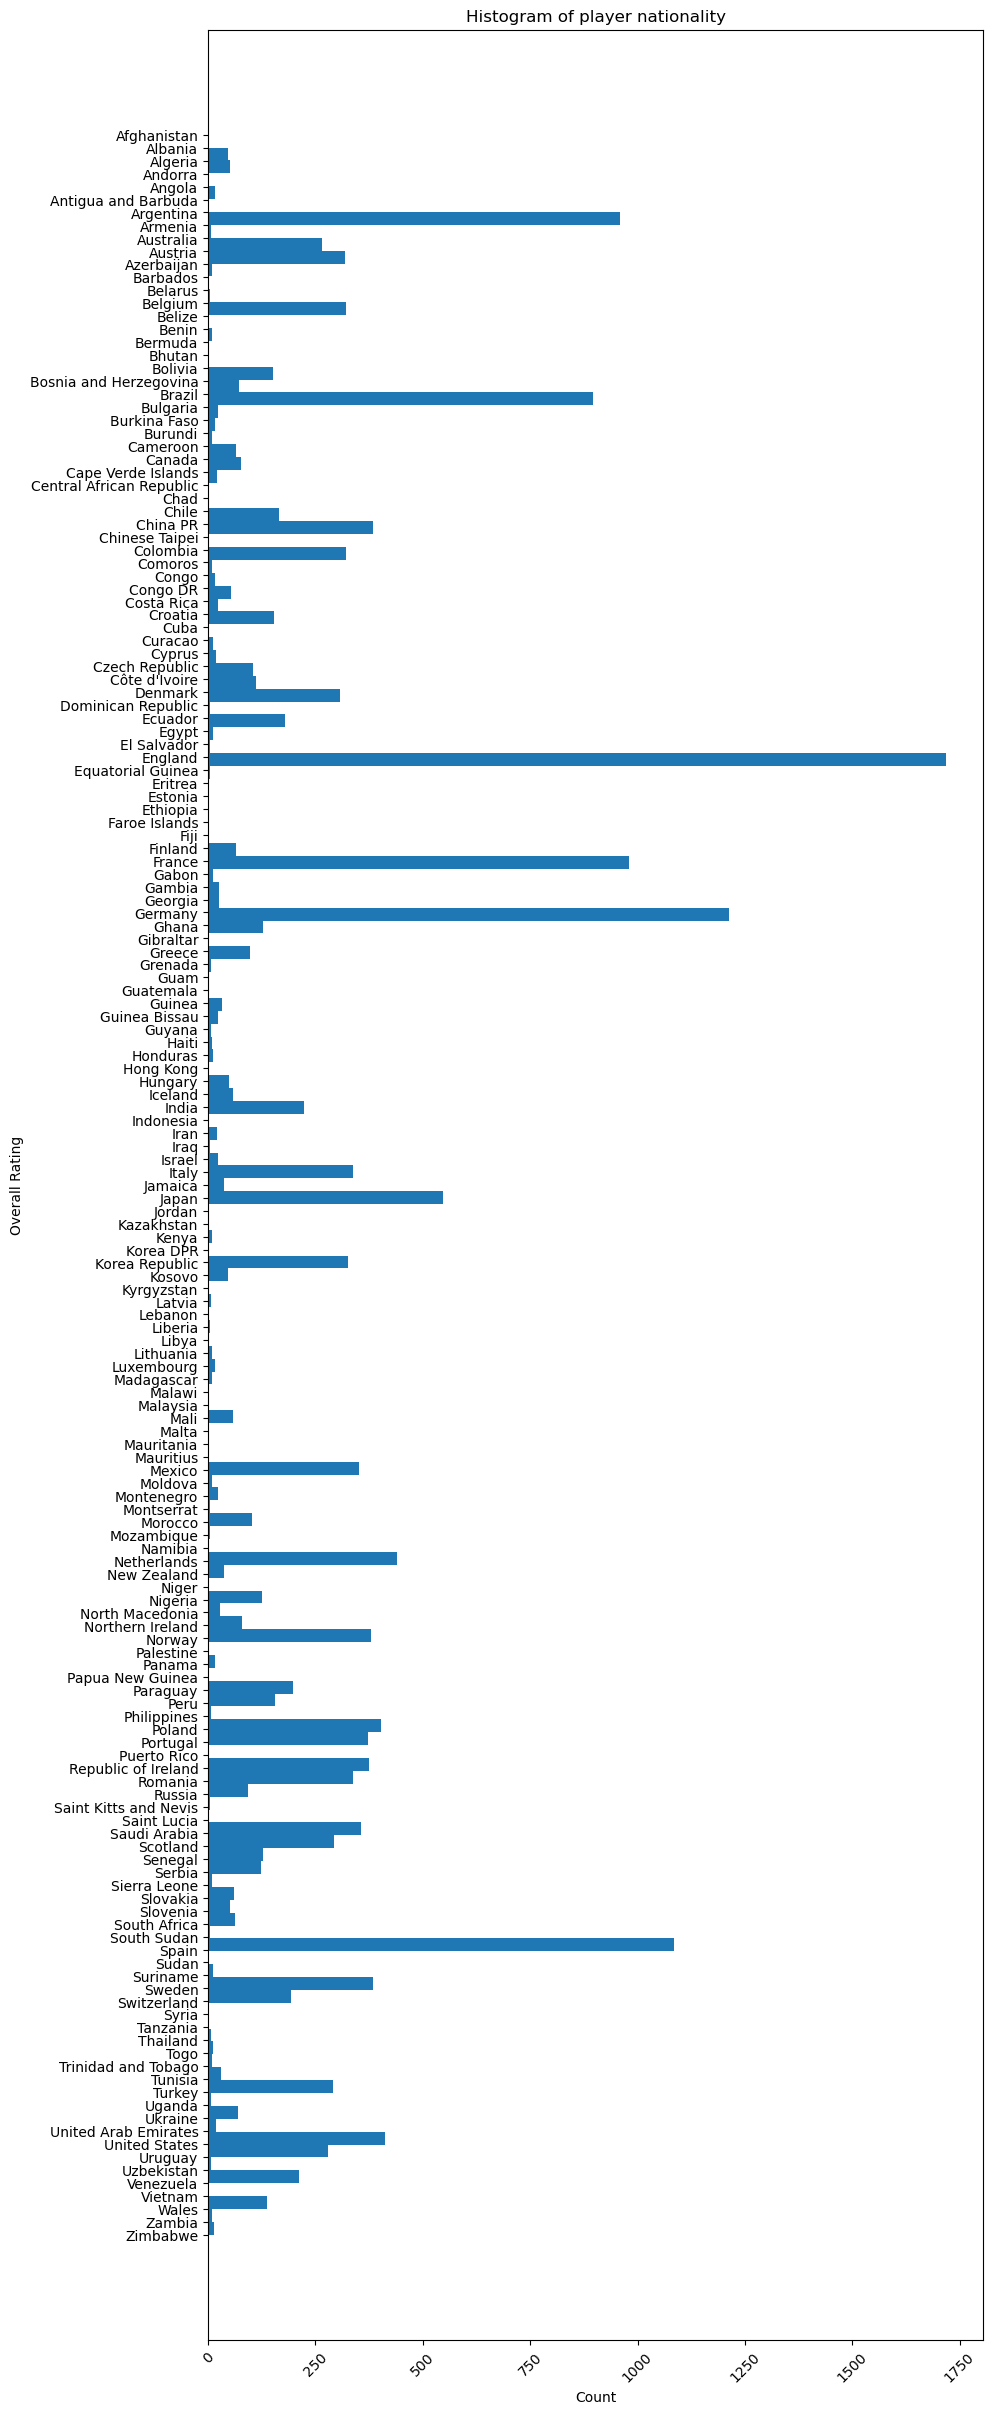

In [12]:
plt.figure(figsize=(10,30))
plt.hist(sorted(player_metadata['nationality_name'], reverse=True), \
         bins = len(pd.unique(player_metadata['nationality_name'])),\
         orientation="horizontal")
plt.title('Histogram of player nationality')
plt.xlabel('Count')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45)
plt.show()

The median player on the game is a 25 year old, English player with a 66/100 FIFA rating who earns 3000 euros per week.  
It will be interesting to see how the top and bottom earners vary from this.

Identify any data cleaning needs (this includes checking for missing data) and write code to perform them. If the data does not need to be cleaned, explain how you reached this conclusion. **(5 points)**

Data cleaning required is of mainly the following types:  
    1. Changing all date/time related strings (ex. club_joined) to counts of days/years.  
    2. Normalizing variables like weak foot, international reputation, etc. (0-5 scale), height, weight (unique distributions), etc. to feed into a predictor.  
    3. Splitting string categories (player_positions, player_tags, player_traits) into separate columns with a 1 for present and 0 for absent.  
     
Another major cleaning step needed is to separate out goalkeepers from the rest.   
They have very differnt stats across categories and will need to be processed separately.
  
There is some missing contractual data for players who do not currently have a contract with any club. These players will be removed from the dataset as they are currently not earning any weekly football related wage.  
  
There could be more changes to make based on the predictor setup but these are what I think is needed now. 

In [13]:
data_working = pd.concat([ player_metadata, player_stats, player_attributes ], axis=1)
len(data_working)

19239

In [14]:
#Drop players with no clubs

data_dropped = data_working.dropna(subset=['club_name'])
len(data_dropped)

19178

In [15]:
#Standardizing date to days since

basedate = pd.Timestamp('2022-11-05')
a = pd.to_datetime(data_dropped['club_joined'])
days = basedate - a
data_dropped['club_joined_time'] = days.astype('timedelta64[ns]')
data_dropped['club_joined_time']

C:\Users\tahir\AppData\Local\Temp\ipykernel_11496\3343727837.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dropped['club_joined_time'] = days.astype('timedelta64[ns]')


0        452 days
1       3049 days
2        435 days
3       1920 days
4       2624 days
           ...   
19234    583 days
19235    621 days
19236    505 days
19237    505 days
19238    431 days
Name: club_joined_time, Length: 19178, dtype: timedelta64[ns]

The other data cleaning needed will depend on the type of predicion and processing that must be done on the data.